In [155]:
import torchvision.io as tio
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [156]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = CNN()

In [157]:
model

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [158]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [159]:
epochs = 100
dog_label = 1.0

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((224, 224)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

image_dataset = datasets.ImageFolder(
    root='../dataset/archive/train/', # Path to the root directory of your images
    transform= transform # Apply transformations,
)

trainLoader = torch.utils.data.DataLoader(
    image_dataset, batch_size=16,shuffle=True)

for epoch in range(epochs):
    running_loss = 0.0

    for i, image_row in enumerate(trainLoader, 0):
        # zero the parameter gradients
        image_data, target = image_row
        optimizer.zero_grad()
        # print(target)
        
        logits = model(image_data)

        loss = criterion(logits, target)

        loss.backward()
        optimizer.step()

    
    print(f'Loss at epoch {epoch}: {loss}')




Loss at epoch 0: 0.6954830884933472
Loss at epoch 1: 0.6897460222244263
Loss at epoch 2: 0.682709276676178
Loss at epoch 3: 0.6645768284797668
Loss at epoch 4: 0.691106915473938
Loss at epoch 5: 0.6958605051040649
Loss at epoch 6: 0.6054832935333252
Loss at epoch 7: 0.6852454543113708
Loss at epoch 8: 0.6500396728515625
Loss at epoch 9: 0.8058103322982788
Loss at epoch 10: 0.4895831346511841
Loss at epoch 11: 0.5917912125587463
Loss at epoch 12: 0.5872243642807007
Loss at epoch 13: 0.640720784664154
Loss at epoch 14: 0.578009843826294
Loss at epoch 15: 1.1595289707183838
Loss at epoch 16: 0.65411376953125
Loss at epoch 17: 0.6020488739013672
Loss at epoch 18: 0.6877192258834839
Loss at epoch 19: 0.4865298569202423
Loss at epoch 20: 0.3901946246623993
Loss at epoch 21: 0.5048547983169556
Loss at epoch 22: 0.42243334650993347
Loss at epoch 23: 0.34435969591140747
Loss at epoch 24: 0.4904305338859558
Loss at epoch 25: 0.25572043657302856
Loss at epoch 26: 0.19030675292015076
Loss at epoch

KeyboardInterrupt: 

In [160]:
image_dataset.classes

['cats', 'dogs']

In [161]:
# inference time
test_image_dataset = datasets.ImageFolder(
    root='../dataset/archive/test/', # Path to the root directory of your images
    transform= transform # Apply transformations,
)

In [162]:
test_image_dataset.classes

['cats', 'dogs']

In [163]:
testLoader = torch.utils.data.DataLoader(
    test_image_dataset, batch_size=1,shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.993297..1.0000002].


It's a Dog!


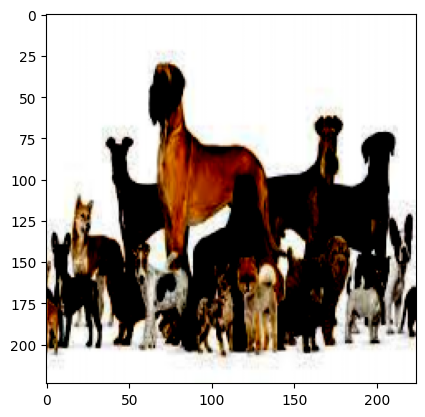

In [174]:
for i, image_row in enumerate(testLoader, 0):
    # zero the parameter gradients
    image_data, target = image_row
    logits = model(image_data)

    _, predicted = torch.max(logits, 1)
    plt.imshow(image_data[0].permute(1,2,0))

    if predicted == 0:
        print("It's a Cat!")
    else:
        print("It's a Dog!")
    
    break

In [165]:
totals = 0
correct = 0

for i, image_row in enumerate(testLoader, 0):
    # zero the parameter gradients
    image_data, target = image_row
    logits = model(image_data)

    _, predicted = torch.max(logits, 1)

    if predicted == target:
        correct += 1
    totals += 1

accuracy = correct / totals * 100
accuracy

60.0